## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [176]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [177]:
data = pd.read_csv(
    "https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv"
)
head_tail_slice = list(range(5))+list(range(-5,0))

data.iloc[head_tail_slice]

status  duration  \
0                           no checking account        18   
1                           no checking account         9   
2                                    ... < 0 DM        12   
3                           no checking account        12   
4                           no checking account        12   
995                         no checking account        24   
996                         no checking account        24   
997  ... >= 200 DM / salary for at least 1 year        21   
998                                  ... < 0 DM        12   
999                         no checking account        30   

                                  credit_history              purpose  amount  \
0        all credits at this bank paid back duly           car (used)    1049   
1        all credits at this bank paid back duly               others    2799   
2    no credits taken/all credits paid back duly           retraining     841   
3        all credits at this bank paid back duly               others    2122   
4        all credits at this bank paid back duly               others    2171   
995  no credits taken/all credits paid back duly  furniture/equipment    1987   
996  no credits taken/all credits paid back duly               others    2303   
997      all credits at this bank paid back duly               others   12680   
998  no credits taken/all credits paid back duly  furniture/equipment    6468   
999  no credits taken/all credits paid back duly           car (used)    6350   

                        savings employment_duration installment_rate  \
0    unknown/no savings account              < 1 yr             < 20   
1    unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
2                 ... <  100 DM    4 <= ... < 7 yrs   25 <= ... < 35   
3    unknown/no savings account    1 <= ... < 4 yrs   20 <= ... < 25   
4    unknown/no savings account    1 <= ... < 4 yrs             < 20   
995  unknown/no savings account    1 <= ... < 4 yrs   25 <= ... < 35   
996  unknown/no savings account            >= 7 yrs             < 20   
997              ... >= 1000 DM            >= 7 yrs             < 20   
998              ... >= 1000 DM          unemployed   25 <= ... < 35   
999              ... >= 1000 DM            >= 7 yrs             < 20   

                      personal_status_sex other_debtors present_residence  \
0    female : non-single or male : single          none          >= 7 yrs   
1                  male : married/widowed          none  1 <= ... < 4 yrs   
2    female : non-single or male : single          none          >= 7 yrs   
3                  male : married/widowed          none  1 <= ... < 4 yrs   
4                  male : married/widowed          none          >= 7 yrs   
995                male : married/widowed          none          >= 7 yrs   
996                male : married/widowed  co-applicant            < 1 yr   
997                male : married/widowed          none          >= 7 yrs   
998                male : married/widowed          none            < 1 yr   
999                male : married/widowed          none          >= 7 yrs   

                  property  age other_installment_plans   housing  \
0             car or other   21                    none  for free   
1    unknown / no property   36                    none  for free   
2    unknown / no property   23                    none  for free   
3    unknown / no property   39                    none  for free   
4             car or other   38                    bank      rent   
995  unknown / no property   21                    none  for free   
996  unknown / no property   45                    none      rent   
997            real estate   30                    none       own   
998            real estate   52                    none      rent   
999           car or other   31                    none      rent   

    number_credits                                         job people_liable

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [178]:
print(data.info(), '\n', 'В таблице нет пропущенных значений.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [179]:
print('Количественные признаки: duration, amount, age. \nБинарные признаки: telephone, foreign_worker, credit_risk. \nПорядковые признаки: status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable. \nКатегориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job.')

Количественные признаки: duration, amount, age. 
Бинарные признаки: telephone, foreign_worker, credit_risk. 
Порядковые признаки: status, savings, employment_duration, installment_rate, present_residence, number_credits, people_liable. 
Категориальные признаки: credit_history, purpose, personal_status_sex, other_debtors, property, other_installment_plans, housing, job.


In [180]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
data

status  duration  \
0                           no checking account        18   
1                           no checking account         9   
2                                    ... < 0 DM        12   
3                           no checking account        12   
4                           no checking account        12   
5                           no checking account        10   
6                           no checking account         8   
7                           no checking account         6   
8    ... >= 200 DM / salary for at least 1 year        18   
9                                    ... < 0 DM        24   
10                          no checking account        11   
11                          no checking account        30   
12                          no checking account         6   
13                                   ... < 0 DM        48   
14                          no checking account        18   
15                          no checking account         6   
16                          no checking account        11   
17                                   ... < 0 DM        18   
18                                   ... < 0 DM        36   
19   ... >= 200 DM / salary for at least 1 year        11   
20                          no checking account         6   
21                                   ... < 0 DM        12   
22                                   ... < 0 DM        36   
23                                   ... < 0 DM        12   
24                          no checking account         6   
25                                   ... < 0 DM        11   
26                          no checking account        12   
27                                   ... < 0 DM         9   
28   ... >= 200 DM / salary for at least 1 year        15   
29                             0<= ... < 200 DM        42   
30                             0<= ... < 200 DM        30   
31   ... >= 200 DM / salary for at least 1 year        36   
32   ... >= 200 DM / salary for at least 1 year        36   
33   ... >= 200 DM / salary for at least 1 year        24   
34                          no checking account        15   
35                          no checking account         6   
36   ... >= 200 DM / salary for at least 1 year        12   
37   ... >= 200 DM / salary for at least 1 year        12   
38   ... >= 200 DM / salary for at least 1 year        18   
39   ... >= 200 DM / salary for at least 1 year        24   
40   ... >= 200 DM / salary for at least 1 year        12   
41                          no checking account        24   
42   ... >= 200 DM / salary for at least 1 year        18   
43                                   ... < 0 DM        24   
44                                   ... < 0 DM        18   
45                          no checking account        18   
46   ... >= 200 DM / salary for at least 1 year        24   
47   ... >= 200 DM / salary for at least 1 year        18   
48   ... >= 200 DM / salary for at least 1 year        24   
49                          no checking account        24   
50   ... >= 200 DM / salary for at least 1 year        12   
51                             0<= ... < 200 DM        36   
52   ... >= 200 DM / salary for at least 1 year         9   
53   ... >= 200 DM / salary for at least 1 year        12   
54   ... >= 200 DM / salary for at least 1 year        24   
55                          no checking account        12   
56   ... >= 200 DM / salary for at least 1 year        12   
57                          no checking account        15   
58   ... >= 200 DM / salary for at least 1 year        21   
59   ... >= 200 DM / salary for at least 1 year        36   
60   ... >= 200 DM / salary for at least 1 year        12   
61   ... >= 200 DM / salary for at least 1 year        24   
62   ... >= 200 DM / salary for at least 1 year        48   
63   ... >= 200 DM / salary for at least 1 year        36   
64                          no checking account        12   
65   ... >= 200

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [181]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [182]:
age_30 = data[data['age'] < 30]
rent_30 = age_30[age_30['housing'] == 'rent']
ans1 = len(rent_30)*100/len(age_30)

age_40 = data[data['age'] > 40]
rent_40 = age_40[age_40['housing'] == 'rent']
ans2 = len(rent_40)*100/len(age_40)

print(round(ans1, 2), '% клиентов моложе 30 лет снимают жилье.\n', round(ans2, 2), '% клиентов старше 40 лет снимают жилье.')

66.67 % клиентов моложе 30 лет снимают жилье.
 68.01 % клиентов старше 40 лет снимают жилье.


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [183]:
all_foreigners = data[data['foreign_worker'] == 'yes']
a = len(all_foreigners[all_foreigners['number_credits'].isin(['4-5']) | all_foreigners['number_credits'].isin(['>= 6'])])
#len(all_foreigners[all_foreigners['number_credits']== ('4-5')]) + len(all_foreigners[all_foreigners['number_credits']== ('>= 6')])
print('У', a, 'иностранца кредитов больше 3.')

У 1 иностранца кредитов больше 3.


### Задание 6 (1 балл)

In [184]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

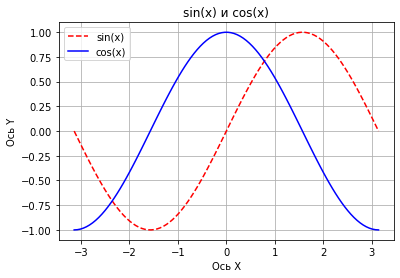

In [185]:
x = np.linspace(-np.pi,np.pi,100)  
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, linestyle = '--', color = 'r', label = 'sin(x)')  #  r - значит red
plt.plot(x, y2, color = 'b', label = 'cos(x)')
plt.xlabel('Ось X')
plt.ylabel('Ось Y')
plt.title('sin(x) и cos(x)')
plt.grid()
plt.legend()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

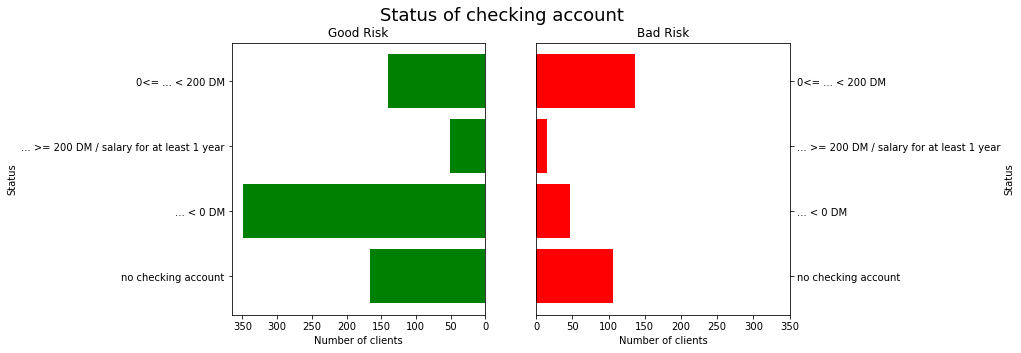

In [186]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
inf = data.groupby('status')['credit_risk'].value_counts()
statuses = data['status'].unique()
goods = inf.iloc[0::2].tolist()
bads = inf.iloc[1::2].tolist()
axs[0].barh(statuses, goods, height=0.8, color = 'g', edgecolor="g", linewidth=2)
axs[1].barh(statuses, bads, height=0.8, left=0, color = 'r', edgecolor="r", linewidth=2)
axs[0].invert_xaxis()
axs[1].set_xlim([0, 350])
axs[1].yaxis.set_ticks_position('right')
axs[0].set_xlabel('Number of clients')
axs[0].set_ylabel('Status')
axs[1].set_xlabel('Number of clients')
axs[1].set_ylabel('Status')
axs[1].yaxis.set_label_position("right")

axs[0].set_title('Good Risk')
axs[1].set_title('Bad Risk')
fig.suptitle('Status of checking account', fontsize = 18)


plt.show()

### Задание 8  (0.5 балла)

In [187]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

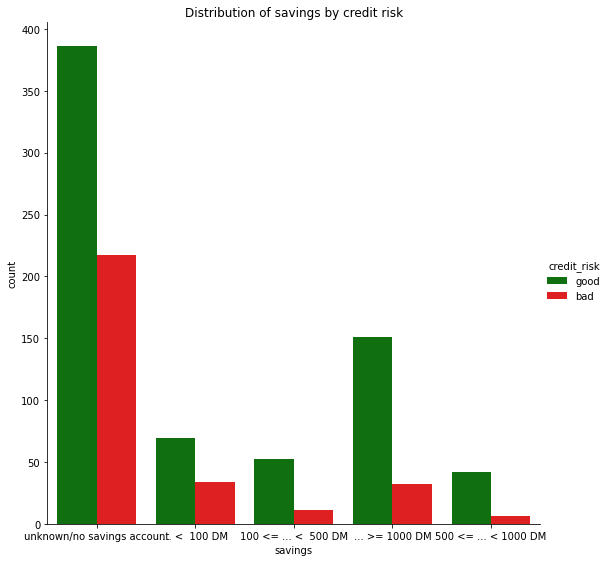

In [188]:
palette = ['g', 'r']
sns.catplot(x='savings',
            hue = 'credit_risk',
            kind='count',
            data=data, palette= palette, height = 7.5)

plt.title('Distribution of savings by credit risk')
plt.show()

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

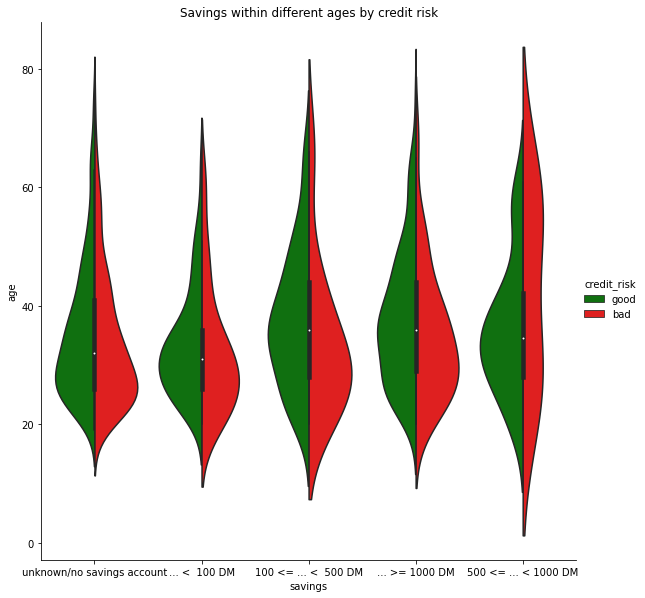

In [189]:
palette = ['g', 'r']
sns.catplot(x='savings',
            y='age',
            hue = 'credit_risk',
            kind='violin',
            split=True,
            data=data, palette= palette, height = 8)
plt.title('Savings within different ages by credit risk')
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

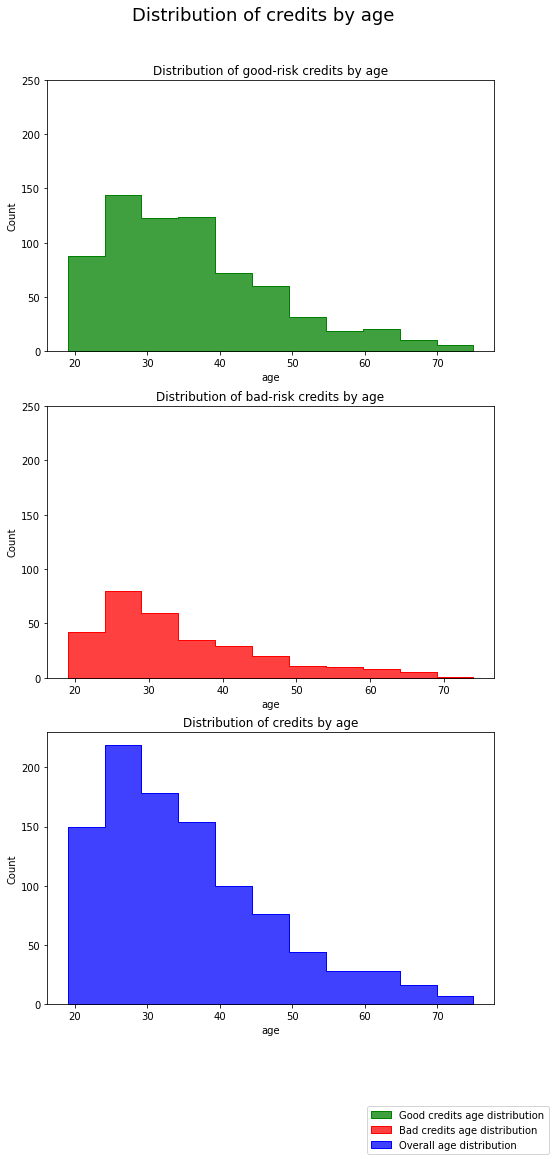

In [190]:
fig, ax = plt.subplots(3,1, figsize=(8,17))
good_credits = data[data['credit_risk'] == 'good']
bad_credits = data[data['credit_risk'] == 'bad']

sns.histplot(good_credits['age'], bins = 11, kde=False, element="step", color = 'g', ax=ax[0])
sns.histplot(bad_credits['age'], bins = 11, kde=False, element="step", color = 'r', ax=ax[1])
sns.histplot(data['age'], bins = 11, kde=False, element="step", color = 'b', ax=ax[2])
ax[0].set_ylim([0, 250])
ax[1].set_ylim([0, 250])
ax[0].set_title('Distribution of good-risk credits by age')
ax[1].set_title('Distribution of bad-risk credits by age')
ax[2].set_title('Distribution of credits by age')
fig.legend(labels=["Good credits age distribution","Bad credits age distribution", 'Overall age distribution'], loc='lower right')
fig.suptitle('Distribution of credits by age', y = 0.94, fontsize = 18)

plt.show()


### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

Text(0.5, 1.0, 'Scatterplot of the duration and the amount of the credit by credit risk')

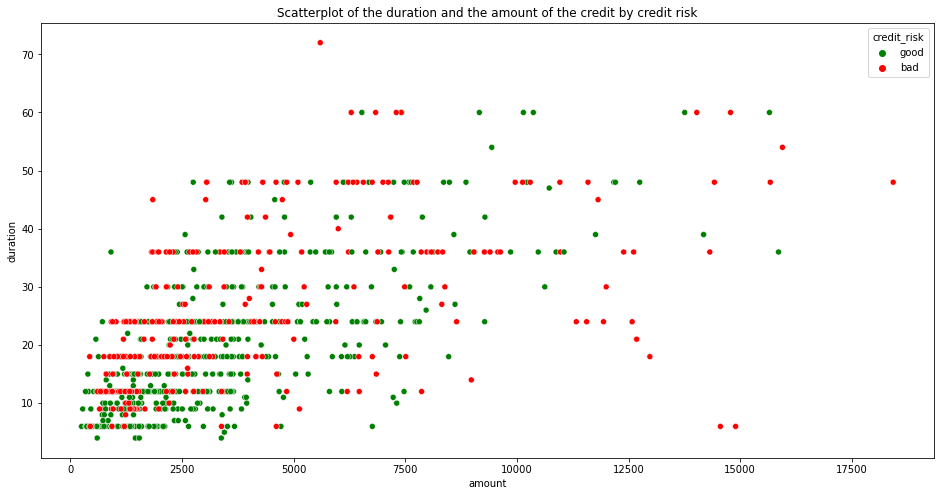

In [191]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette = palette)
plt.title('Scatterplot of the duration and the amount of the credit by credit risk')


### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

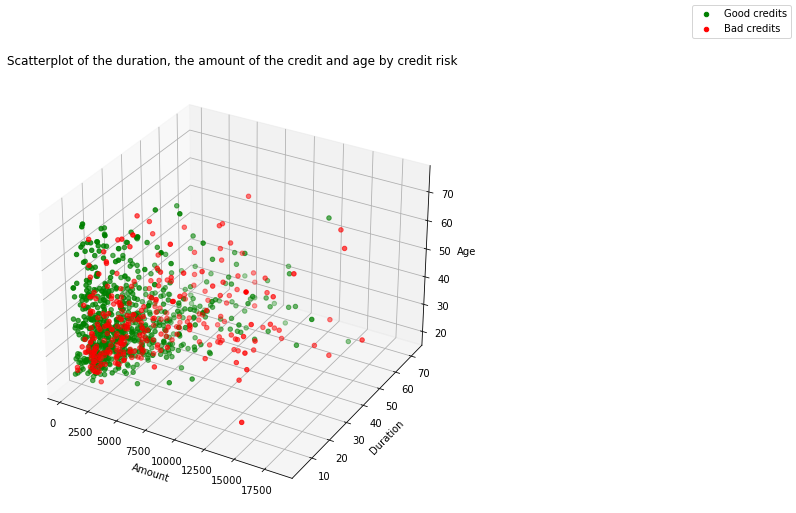

In [192]:
good_credits = data[data['credit_risk'] == 'good']
bad_credits = data[data['credit_risk'] == 'bad']
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(111, projection = '3d')

x1 = good_credits['amount']
y1 = good_credits['duration']
z1 = good_credits['age']

ax.set_xlabel("Amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

ax.scatter(x1, y1, z1, color = 'g')

x2 = bad_credits['amount']
y2 = bad_credits['duration']
z2 = bad_credits['age']

ax.scatter(x2, y2, z2, color = 'r')

fig.legend(labels=["Good credits","Bad credits"], loc='upper right')
plt.title('Scatterplot of the duration, the amount of the credit and age by credit risk')
plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [193]:
data

status  duration  \
0                           no checking account        18   
1                           no checking account         9   
2                                    ... < 0 DM        12   
3                           no checking account        12   
4                           no checking account        12   
5                           no checking account        10   
6                           no checking account         8   
7                           no checking account         6   
8    ... >= 200 DM / salary for at least 1 year        18   
9                                    ... < 0 DM        24   
10                          no checking account        11   
11                          no checking account        30   
12                          no checking account         6   
13                                   ... < 0 DM        48   
14                          no checking account        18   
15                          no checking account         6   
16                          no checking account        11   
17                                   ... < 0 DM        18   
18                                   ... < 0 DM        36   
19   ... >= 200 DM / salary for at least 1 year        11   
20                          no checking account         6   
21                                   ... < 0 DM        12   
22                                   ... < 0 DM        36   
23                                   ... < 0 DM        12   
24                          no checking account         6   
25                                   ... < 0 DM        11   
26                          no checking account        12   
27                                   ... < 0 DM         9   
28   ... >= 200 DM / salary for at least 1 year        15   
29                             0<= ... < 200 DM        42   
30                             0<= ... < 200 DM        30   
31   ... >= 200 DM / salary for at least 1 year        36   
32   ... >= 200 DM / salary for at least 1 year        36   
33   ... >= 200 DM / salary for at least 1 year        24   
34                          no checking account        15   
35                          no checking account         6   
36   ... >= 200 DM / salary for at least 1 year        12   
37   ... >= 200 DM / salary for at least 1 year        12   
38   ... >= 200 DM / salary for at least 1 year        18   
39   ... >= 200 DM / salary for at least 1 year        24   
40   ... >= 200 DM / salary for at least 1 year        12   
41                          no checking account        24   
42   ... >= 200 DM / salary for at least 1 year        18   
43                                   ... < 0 DM        24   
44                                   ... < 0 DM        18   
45                          no checking account        18   
46   ... >= 200 DM / salary for at least 1 year        24   
47   ... >= 200 DM / salary for at least 1 year        18   
48   ... >= 200 DM / salary for at least 1 year        24   
49                          no checking account        24   
50   ... >= 200 DM / salary for at least 1 year        12   
51                             0<= ... < 200 DM        36   
52   ... >= 200 DM / salary for at least 1 year         9   
53   ... >= 200 DM / salary for at least 1 year        12   
54   ... >= 200 DM / salary for at least 1 year        24   
55                          no checking account        12   
56   ... >= 200 DM / salary for at least 1 year        12   
57                          no checking account        15   
58   ... >= 200 DM / salary for at least 1 year        21   
59   ... >= 200 DM / salary for at least 1 year        36   
60   ... >= 200 DM / salary for at least 1 year        12   
61   ... >= 200 DM / salary for at least 1 year        24   
62   ... >= 200 DM / salary for at least 1 year        48   
63   ... >= 200 DM / salary for at least 1 year        36   
64                          no checking account        12   
65   ... >= 200

In [194]:
data.loc[data['telephone'] == 'no', 'telephone'] = 0
data.loc[data['telephone'] == 'yes (under customer name)', 'telephone'] = 1

data.loc[data['foreign_worker'] == 'no', 'foreign_worker'] = 0
data.loc[data['foreign_worker'] == 'yes', 'foreign_worker'] = 1

data.loc[data['credit_risk'] == 'bad', 'credit_risk'] = 0
data.loc[data['credit_risk'] == 'good', 'credit_risk'] = 1

data.loc[data['people_liable'] == '0 to 2', 'people_liable'] = 0
data.loc[data['people_liable'] == '3 or more', 'people_liable'] = 1

data.loc[data['status'] == '... >= 200 DM / salary for at least 1 year', 'status'] = 3
data.loc[data['status'] == '0<= ... < 200 DM', 'status'] = 2
data.loc[data['status'] == '... < 0 DM', 'status'] = 1
data.loc[data['status'] == 'no checking account', 'status'] = 0

data.loc[data['savings'] == '... >= 1000 DM', 'savings'] = 4
data.loc[data['savings'] == '500 <= ... < 1000 DM', 'savings'] = 3
data.loc[data['savings'] == '100 <= ... <  500 DM', 'savings'] = 2
data.loc[data['savings'] == '... <  100 DM', 'savings'] = 1
data.loc[data['savings'] == 'unknown/no savings account', 'savings'] = 0

data.loc[data['employment_duration'] == '>= 7 yrs', 'employment_duration'] = 4
data.loc[data['employment_duration'] == '4 <= ... < 7 yrs', 'employment_duration'] = 3
data.loc[data['employment_duration'] == '1 <= ... < 4 yrs', 'employment_duration'] = 2
data.loc[data['employment_duration'] == '< 1 yr', 'employment_duration'] = 1
data.loc[data['employment_duration'] == 'unemployed', 'employment_duration'] = 0

data.loc[data['installment_rate'] == '>= 35', 'installment_rate'] = 3
data.loc[data['installment_rate'] == '25 <= ... < 35', 'installment_rate'] = 2
data.loc[data['installment_rate'] == '20 <= ... < 25', 'installment_rate'] = 1
data.loc[data['installment_rate'] == '< 20', 'installment_rate'] = 0

data.loc[data['present_residence'] == '>= 7 yrs', 'present_residence'] = 3
data.loc[data['present_residence'] == '4 <= ... < 7 yrs', 'present_residence'] = 2
data.loc[data['present_residence'] == '1 <= ... < 4 yrs', 'present_residence'] = 1
data.loc[data['present_residence'] == '< 1 yr', 'present_residence'] = 0

data.loc[data['number_credits'] == '>= 6', 'number_credits'] = 3
data.loc[data['number_credits'] == '4-5', 'number_credits'] = 2
data.loc[data['number_credits'] == '2-3', 'number_credits'] = 1
data.loc[data['number_credits'] == '1', 'number_credits'] = 0


data = data.drop(['credit_history', 'purpose', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'], axis = 1)

data

status  duration  amount savings employment_duration installment_rate  \
0        0        18    1049       0                   1                0   
1        0         9    2799       0                   2                2   
2        1        12     841       1                   3                2   
3        0        12    2122       0                   2                1   
4        0        12    2171       0                   2                0   
5        0        10    2241       0                   1                3   
6        0         8    3398       0                   3                3   
7        0         6    1361       0                   1                2   
8        3        18    1098       0                   0                0   
9        1        24    3758       2                   0                3   
10       0        11    3905       0                   2                2   
11       0        30    6187       1                   3                3   
12       0         6    1957       0                   3                3   
13       1        48    7582       1                   0                2   
14       0        18    1936       4                   3                2   
15       0         6    2647       2                   2                2   
16       0        11    3939       0                   2                3   
17       1        18    3213       2                   1                3   
18       1        36    2337       0                   4                0   
19       3        11    7228       0                   2                3   
20       0         6    3676       0                   2                3   
21       1        12    3124       0                   1                3   
22       1        36    2384       0                   1                0   
23       1        12    1424       0                   3                0   
24       0         6    4716       4                   1                3   
25       1        11    4771       0                   3                2   
26       0        12     652       0                   4                0   
27       1         9    1154       0                   4                2   
28       3        15    3556       4                   2                1   
29       2        42    4796       0                   4                0   
30       2        30    3017       0                   4                0   
31       3        36    3535       0                   3                0   
32       3        36    6614       0                   4                0   
33       3        24    1376       2                   3                0   
34       0        15    1721       0                   1                2   
35       0         6     860       0                   4                3   
36       3        12    1495       0                   4                0   
37       3        12    1934       0                   4                2   
38       3        18    3378       4                   2                2   
39       3        24    3868       0                   4                0   
40       3        12     996       4                   3                0   
41       0        24    1755       0                   4                0   
42       3        18    1028       0                   2                0   
43       1        24    2825       4                   3                0   
44       1        18    1239       4                   2                0   
45       0        18    1216       0                   1                0   
46       3        24    1258       0                   3                0   
47       3        18    1864       1                   2                0   
48       3        24    1474       1                   1                0   
49       0        24    1382       1                   3                0   
50       3        12     640       0                   2                0   


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [195]:
#отмасштабируем наши признаки от 0 до 1
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()

names = data.columns
d = scaler.fit_transform(data)

data = pd.DataFrame(d, columns=names)
data

status  duration    amount  savings  employment_duration  \
0    0.000000  0.205882  0.043964     0.00                 0.25   
1    0.000000  0.073529  0.140255     0.00                 0.50   
2    0.333333  0.117647  0.032519     0.25                 0.75   
3    0.000000  0.117647  0.103004     0.00                 0.50   
4    0.000000  0.117647  0.105700     0.00                 0.50   
5    0.000000  0.088235  0.109552     0.00                 0.25   
6    0.000000  0.058824  0.173214     0.00                 0.75   
7    0.000000  0.029412  0.061131     0.00                 0.25   
8    1.000000  0.205882  0.046660     0.00                 0.00   
9    0.333333  0.294118  0.193023     0.50                 0.00   
10   0.000000  0.102941  0.201111     0.00                 0.50   
11   0.000000  0.382353  0.326675     0.25                 0.75   
12   0.000000  0.029412  0.093925     0.00                 0.75   
13   0.333333  0.647059  0.403433     0.25                 0.00   
14   0.000000  0.205882  0.092770     1.00                 0.75   
15   0.000000  0.029412  0.131892     0.50                 0.50   
16   0.000000  0.102941  0.202982     0.00                 0.50   
17   0.333333  0.205882  0.163035     0.50                 0.25   
18   0.333333  0.470588  0.114834     0.00                 1.00   
19   1.000000  0.102941  0.383955     0.00                 0.50   
20   0.000000  0.029412  0.188511     0.00                 0.50   
21   0.333333  0.117647  0.158138     0.00                 0.25   
22   0.333333  0.470588  0.117420     0.00                 0.25   
23   0.333333  0.117647  0.064598     0.00                 0.75   
24   0.000000  0.029412  0.245736     1.00                 0.25   
25   0.333333  0.102941  0.248762     0.00                 0.75   
26   0.000000  0.117647  0.022120     0.00                 1.00   
27   0.333333  0.073529  0.049741     0.00                 1.00   
28   1.000000  0.161765  0.181908     1.00                 0.50   
29   0.666667  0.558824  0.250138     0.00                 1.00   
30   0.666667  0.382353  0.152250     0.00                 1.00   
31   1.000000  0.470588  0.180753     0.00                 0.75   
32   1.000000  0.470588  0.350171     0.00                 1.00   
33   1.000000  0.294118  0.061957     0.50                 0.75   
34   0.000000  0.161765  0.080940     0.00                 0.25   
35   0.000000  0.029412  0.033564     0.00                 1.00   
36   1.000000  0.117647  0.068504     0.00                 1.00   
37   1.000000  0.117647  0.092660     0.00                 1.00   
38   1.000000  0.205882  0.172114     1.00                 0.50   
39   1.000000  0.294118  0.199076     0.00                 1.00   
40   1.000000  0.117647  0.041048     1.00                 0.75   
41   0.000000  0.294118  0.082811     0.00                 1.00   
42   1.000000  0.205882  0.042808     0.00                 0.50   
43   0.333333  0.294118  0.141686     1.00                 0.75   
44   0.333333  0.205882  0.054418     1.00                 0.50   
45   0.000000  0.205882  0.053153     0.00                 0.25   
46   1.000000  0.294118  0.055464     0.00                 0.75   
47   1.000000  0.205882  0.088808     0.25                 0.50   
48   1.000000  0.294118  0.067349     0.25                 0.25   
49   0.000000  0.294118  0.062287     0.25                 0.75   
50   1.000000  0.117647  0.021459     0.00                 0.50   
51   0.666667  0.470588  0.201882     0.00                 0.50   
52   1.000000  0.073529  0.053593     0.00                 0.50   
53   1.000000  0.117647  0.114504     1.00                 1.00   
54   1.000000  0.294118  0.333608     1.00                 1.00   
55   0.000000  0.117647  0.007428     0.00                 0.75   
56   1.000000  0.117647  0.077308     0.00                 1.00   
57   0.000000  0.161765  0.044184     0.00                 0.25   
58   1.000000  0.250000  0.160119     1.00            

<AxesSubplot:>

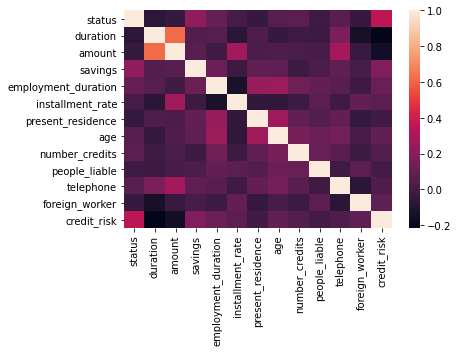

In [196]:
#посмотрим на корреляцию между признаками и фактом выставления кредитного риска "хорошего"
sns.heatmap(data.corr())
#получается, что "статус" оказывает наибольшее влияние на проставление кредитного риска

In [197]:
#найдем среднее значение суммы показателей, у которых хороший кредитный риск, но учтем, что корреляция между статусом и риском равна 0.3, поэтому вес этому признаку дадим наибольший, равный 0.3
good_credits = data[data['credit_risk'] == 1]
good_credits = good_credits.drop(['credit_risk'], axis = 1)
data_g_without = data.loc[:, 'duration':'foreign_worker']
good_credits['mean'] = (0.7/12)*data_g_without.sum(axis=1) + 0.3 * good_credits['status']
mean = np.mean(good_credits['mean'])
mean

0.38241759293681166

In [199]:
#теперь для предсказывания будем сравнивать среднее значение входящего с теми, у кого хороший кредитный риск (у входящего также "статус" имеет больший вес, чем остальные признаки)
#в случае если среднее у входящего больше среднего с хорошим риском, тоже даем хороший риск, т.е. 1, в обратном случае - плохой, т.е. 0
result = []
def predict(Xtest: np.array) -> np.array:
    for i in Xtest:
        i_mean = (0.7/12)*i[1:].sum() + 0.3 * i[0]
        if i_mean > mean:
            result.append(1)
        else:
            result.append(0)
    return result


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)


accuracy_score(y_test, predict(X_test))

0.612